In [209]:
# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff  
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimizacao de hiperparametros
import optuna

In [210]:
# Carregar Dataset
df_segmento = pd.read_csv('./datasets/segmento_clientes.csv')

### EDA

In [211]:
# Visualizar os dados
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [212]:
# # Estrutuda do dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [213]:
# Valores possiveis - variaveis categoricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [214]:
# Valores possiveis - variaveis categoricas
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [215]:
# Valores possiveis - variaveis categoricas
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [216]:
# Valores possiveis - variaveis categoricas
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [217]:
# Distribuicaoda variavel segmento de cliente (Target)
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [218]:
# Criar uma lista ordenada do target
list_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [219]:
# Distribuicao da variavel target - contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': list_segmentos})

In [220]:
# Distribuicao da variavel target - percentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': list_segmentos})

In [221]:
# Distribuicao da variavel localizacao - percentual
percentual_localizacao = df_segmento['localizacao'].value_counts() / len(df_segmento) * 100
px.bar(percentual_localizacao, color=percentual_localizacao.index)

In [222]:
# Distribuicao da variavel atividade economica - percentual
percentual_atividade = df_segmento['atividade_economica'].value_counts() / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

In [223]:
# Distribuicao da variavel inovacao - percentual
percentual_inovacao = df_segmento['inovacao'].value_counts() / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [224]:
# Tabela de contigencia entre localizacao e target (segmento de cliente)
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[list_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

# Mostrar a tabela crostab
tabela_localizacao.show()

In [225]:
# Tabela de contigencia entre atividade_economica e target (segmento de cliente)
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[list_segmentos].reset_index()
tabela_atividade = ff.create_table(crosstab_atividade)

# Mostrar a tabela crostab
tabela_atividade.show()

In [226]:
# Tabela de contigencia entre inovacao e target (segmento de cliente)
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[list_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao)

# Mostrar a tabela crostab
tabela_inovacao.show()

In [227]:
# Distribuicao idade da empresa
px.histogram(df_segmento, x='idade')

In [228]:
# Distribuicao faturamento mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [229]:
# BoxPlot - idade da empresa por segmento de cliente
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': list_segmentos})

In [230]:
# BoxPlot - faturamento da empresa por segmento de cliente
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': list_segmentos})

### Correlacao entre segmento_de_cliente e localizacao

In [231]:
# Teste de Qui-quadrado de Pearson
# H0 - as variaveis sao independentes
# H1 - as variaveis nao sao independentes
# Se p-value > 0.05, aceita a hipotese nula, caso contrario rejeita
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')


c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [232]:
# Valor esperado
# E a frequencia que seria esperado se nao houve associacao entre as variaveis
# E calculado utilizando a distribuicao assumida no teste qui-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [233]:
# Valor observado
# E a frequencia real dos dados coletados
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [234]:
# Estatisticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


As variaveis localizacao e segmento_de_cliente sao independentes.

### Correlacao entre segmento_de_cliente e atividade_economica

In [235]:
# Teste de Qui-quadrado de Pearson
# H0 - as variaveis sao independentes
# H1 - as variaveis nao sao independentes
# Se p-value > 0.05, aceita a hipotese nula, caso contrario rejeita
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')


c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7406: RuntimeWarning:

divide by zero encountered in divide



In [236]:
# Valor esperado
# E a frequencia que seria esperado se nao houve associacao entre as variaveis
# E calculado utilizando a distribuicao assumida no teste qui-quadrado
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [237]:
# Valor observado
# E a frequencia real dos dados coletados
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [238]:
# Estatisticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,9.96998,9.0,0.35292,0.08153,0.18948
1,cressie-read,0.66667,10.60995,9.0,0.30339,0.08410,0.20060
2,log-likelihood,0.00000,13.54637,9.0,0.13940,0.09503,0.25375
3,freeman-tukey,-0.50000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,9.0,0.00000,inf,NaN
5,neyman,-2.00000,NaN,9.0,NaN,NaN,NaN


As variaveis atividade_economica e segmento de cliente sao independentes.

### Correlacao entre inovacao e atividade_economica

In [239]:
# Teste de Qui-quadrado de Pearson
# H0 - as variaveis sao independentes
# H1 - as variaveis nao sao independentes
# Se p-value > 0.05, aceita a hipotese nula, caso contrario rejeita
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')


c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\scipy\stats\_stats_py.py:7406: RuntimeWarning:

divide by zero encountered in divide



In [240]:
# Valor esperado
# E a frequencia que seria esperado se nao houve associacao entre as variaveis
# E calculado utilizando a distribuicao assumida no teste qui-quadrado
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [241]:
# Valor observado
# E a frequencia real dos dados coletados
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [242]:
# Estatisticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


As variaveis inovacao e segmento de cliente nao sao independentes.

### Treinamento do Modelo

In [243]:
# Separar X e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [244]:
# Pipeline
# OnHotEncode nas variaveis categoricas
# Treinamento do Modelo

# Lista de variaveis categoricas
categorical_features = ['atividade_economica', 'localizacao']

# criar um transformador de variaveis categoricas usando OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com o pre-processamento e o modelo de arvores de decisao
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

### Validacao cruzada

In [245]:
# Treinar o modelo com validacao cruzada, usando StratifiedKFold, dado que as clases estao desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_results = cross_validate(dt_model, X, y, cv=cv_folds, scoring='accuracy', return_estimator=True)

In [246]:
# Mostrar returno do Cross Validation
metrics_results

{'fit_time': array([0.00451303, 0.00300574, 0.00251508]),
 'score_time': array([0.00200534, 0.00150371, 0.00200081]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [247]:
# Media da accuracy, considerando as 3 folds
metrics_results['test_accuracy'].mean()

KeyError: 'test_accuracy'

Acuracia
total de previsoes corretas / total de previsoes

### Metricas

In [ ]:
# Fazendo predicoes usando Cross Validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [ ]:
# Avaliar o desempenho do modelo
classification_report_str = classification_report(y, y_pred)

print(f'Classification Report:\n{classification_report_str}')

Classification Report:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\marci\.virtualenvs\ml-decision-tree-classification-lPBLbI5A\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



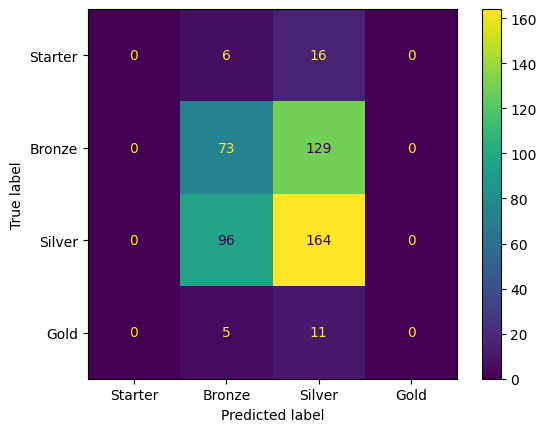

In [ ]:
# Mostrar Matriz de Confusao
confusion_mtx = confusion_matrix(y, y_pred, labels=list_segmentos)
disp = ConfusionMatrixDisplay(confusion_mtx, display_labels=list_segmentos)
disp.plot()

### Tuning de Hiperparametros

In [248]:
# Ajustar hiperparametros do modelo usando Optuna
# min_samples_leaf: minimo de instancias requerido para formar uma folha (node terminal)
# max_depth: profundidade maxima da arvore

def decision_tree_optuna(trial):
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)
    
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)
    
    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')
    
    return scores.mean()

In [251]:
# Executar a automacao de experimentos
estudo_decision_tree = optuna.create_study(direction='maximize')
estudo_decision_tree.optimize(decision_tree_optuna, n_trials=200)

[I 2025-09-29 22:43:41,251] A new study created in memory with name: no-name-f913f204-3ad3-4f8a-9baf-b4ad49ad6331
[I 2025-09-29 22:43:41,270] Trial 0 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 10, 'max_depth': 7}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-09-29 22:43:41,288] Trial 1 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 7, 'max_depth': 6}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-09-29 22:43:41,304] Trial 2 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 18, 'max_depth': 8}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-09-29 22:43:41,322] Trial 3 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 18, 'max_depth': 6}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-09-29 22:43:41,339] Trial 4 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 5, 'max_depth': 8}. Best is trial 0 with value

In [254]:
# Mostrar melhor resultado e melhor conjunto de hiperparametros
print(f'Melhor Acuracia: {estudo_decision_tree.best_value}')
print(f'Melhores Hiperparametros: {estudo_decision_tree.best_params}')

Melhor Acuracia: 0.4740518962075848
Melhores Hiperparametros: {'min_samples_leaf': 8, 'max_depth': 2}
